In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
def parse_gro_file(gro_file_path):
    with open(gro_file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip header and last line (box vectors)
    atom_lines = lines[2:-1]

    # Initialize min and max coordinates
    min_coords = [float('inf'), float('inf'), float('inf')]
    max_coords = [-float('inf'), -float('inf'), -float('inf')]

    for line in atom_lines:
        # Extract coordinates
        x, y, z = float(line[20:28]), float(line[28:36]), float(line[36:44])

        # Update min and max coordinates
        min_coords = [min(min_coords[i], coord) for i, coord in enumerate([x, y, z])]
        max_coords = [max(max_coords[i], coord) for i, coord in enumerate([x, y, z])]

    min_coords=np.array(min_coords)*10
    max_coords=np.array(max_coords)*10
    return min_coords, max_coords

# Replace 'your_file.gro' with the path to your GRO file
min_coordinates, max_coordinates = parse_gro_file('../gromacs3/topology/processed.gro')

print("Minimum coordinates:", min_coordinates)
print("Maximum coordinates:", max_coordinates)
max_coordinates-min_coordinates

Minimum coordinates: [ 6.2  16.03 91.35]
Maximum coordinates: [ 17.03  26.58 180.97]


array([10.83, 10.55, 89.62])

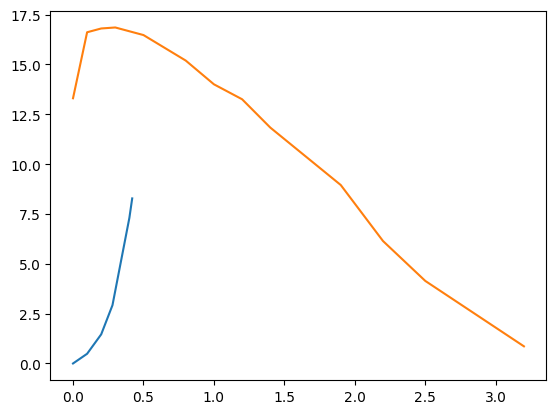

In [19]:
points=[0, 0.00,
0.10, 0.487,
0.20, 1.461,
0.28, 2.922,
0.32, 4.383,
0.36, 5.843,
0.40, 7.304,
0.42, 8.278]

plt.plot(points[0::2],points[1::2])

points_2=[0, 13.3,
0.1, 16.61,
0.2, 16.8,
0.3, 16.85,
0.5, 16.47,
0.8, 15.19,
1.0, 14,
1.2, 13.25,
1.4, 11.83,
1.9, 8.95,
2.2, 6.14,
2.5, 4.14,
3.2, 0.86]

plt.plot(points_2[0::2],points_2[1::2])


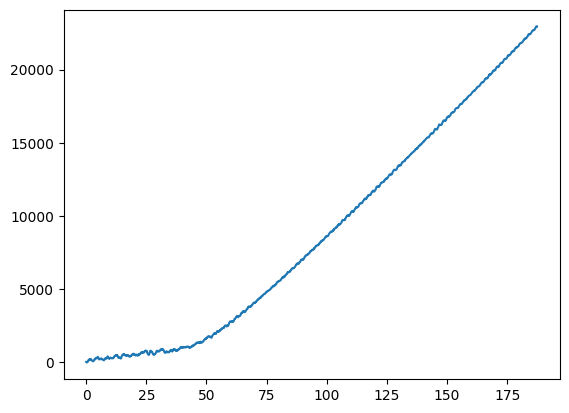

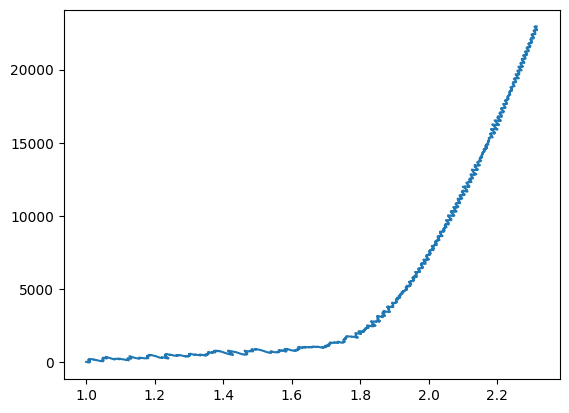

In [20]:
# Replace this with your .xvg file path
path_for = '../gromacs3/md_5_0/md_pullf.xvg'

# Read the file, skipping the header
data_for = pd.read_csv(path_for, delim_whitespace=True, comment='@', header=None, skiprows=17)

path_dis = '../gromacs3/md_5_0/md_pullx.xvg'

# Read the file, skipping the header
data_dis = pd.read_csv(path_dis, delim_whitespace=True, comment='@', header=None, skiprows=17)

# Assuming the first column is time, the second is force/displacement
time = data_dis[0]

# Perform your analysis here
# For example, calculating the average:
plt.plot(time,data_for[1])
plt.show()
plt.plot(data_dis[1]/data_dis[1][0],data_for[1])

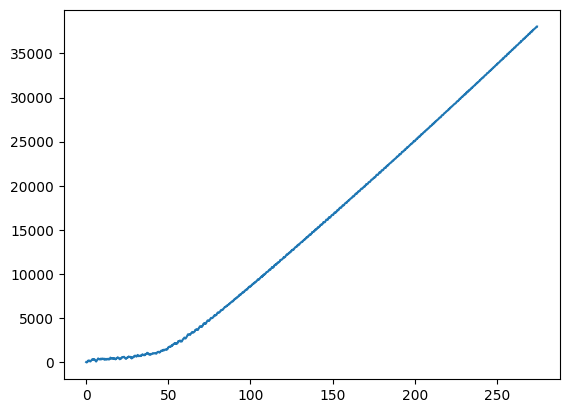

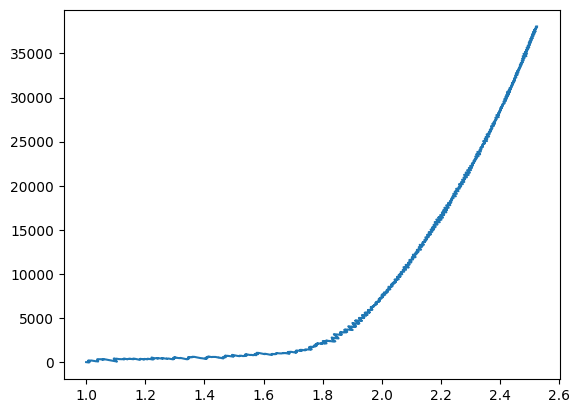

In [23]:
# Replace this with your .xvg file path
path_for = '../gromacs3/md_2_1/md_pullf.xvg'

# Read the file, skipping the header
data_for = pd.read_csv(path_for, delim_whitespace=True, comment='@', header=None, skiprows=17)

path_dis = '../gromacs3/md_2_1/md_pullx.xvg'

# Read the file, skipping the header
data_dis = pd.read_csv(path_dis, delim_whitespace=True, comment='@', header=None, skiprows=17)

# Assuming the first column is time, the second is force/displacement
time = data_dis[0]

# Perform your analysis here
# For example, calculating the average:
plt.plot(data_for[0],data_for[1])
plt.show()
plt.plot(data_dis[1][:-17]/data_dis[1][0],data_for[1])

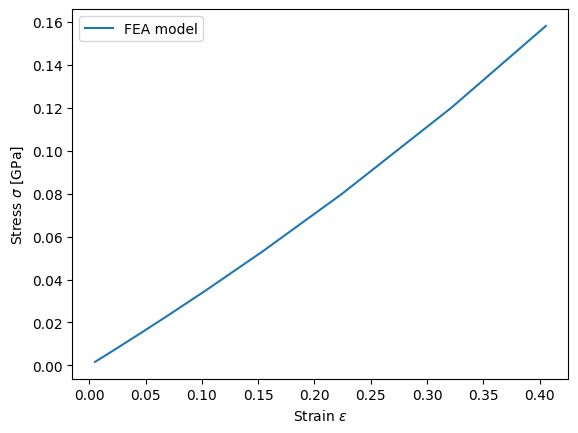

In [ ]:
plot_abaqus=pd.read_csv('./abaqus/stress_strain_plot.csv')
plt.plot(plot_abaqus['0'],plot_abaqus['0.1'],label='FEA model')

# plot_gromacs=pd.read_csv('./gromacs/stress_strain.csv')
# plt.plot(plot_gromacs[],plot_gromacs[],label='MD model')

plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $\sigma$ [GPa]')
plt.legend()